In [7]:
import pandas as pd
import os
import plotly.express as px
import plotly.offline as pyo

In [8]:
df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


### Check Description of each column

In [9]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [10]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [11]:
df['Year'].min()

1960

In [12]:
df['Year'].max()

2016

### Analysing Arab World

<Axes: xlabel='Year'>

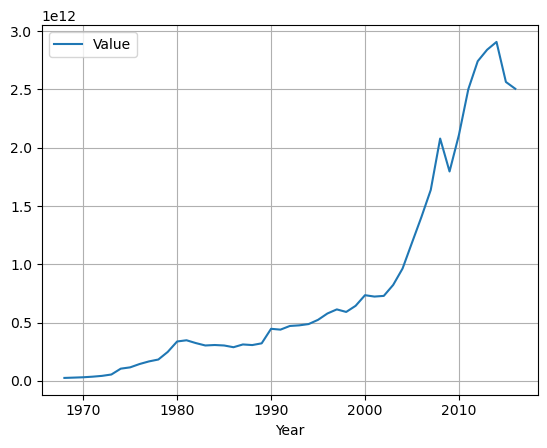

In [13]:
df_pr = df[df['Country Name'] == 'Arab World']
df_pr.plot(kind = 'line', grid = True, x = 'Year', y = 'Value')

### Finding GDP Growth for a country Arab world

In [14]:
df_pr = df[df['Country Name'] == 'Arab World']

data = df_pr.values

gdp_change = [0]

for i in range(1, len(data)):
    prev = data[i-1][3]
    curr = data[i][3]
    per = round(((curr-prev)/prev)* 100, 2)
    gdp_change.append(per)
df_pr.assign(GDP_Change = gdp_change)

,Country Name,Country Code,Year,Value,GDP_Change
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


### Finding GDP Growth of every country

In [15]:
final_gdp = []
for country in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country]
    
    data = df_pr.values

    gdp_change = [0]

    for i in range(1, len(data)):
        prev = data[i-1][3]
        curr = data[i][3]
        per = round(((curr-prev)/prev)* 100, 2)
        gdp_change.append(per)
    df_pr = df_pr.assign(GDP_Change = gdp_change)
    final_gdp.append(df_pr)
df = pd.concat(final_gdp, axis = 0)

In [16]:
df.groupby('Country Name')['Value'].max().sort_values(ascending = False)

Country Name
World                        7.904923e+13
High income                  5.036240e+13
OECD members                 4.937008e+13
Post-demographic dividend    4.673504e+13
IDA & IBRD total             2.948247e+13
                                 ...     
Palau                        3.102483e+08
Marshall Islands             1.944979e+08
Kiribati                     1.880457e+08
Nauru                        1.170204e+08
Tuvalu                       3.987575e+07
Name: Value, Length: 256, dtype: float64

In [17]:
df.groupby('Country Name')['Value'].min().sort_values(ascending = False).head(50)

Country Name
World                                                   1.366678e+12
OECD members                                            1.071152e+12
High income                                             1.060258e+12
Post-demographic dividend                               1.044695e+12
Europe & Central Asia (IDA & IBRD countries)            8.202138e+11
Europe & Central Asia (excluding high income)           6.504501e+11
North America                                           5.844779e+11
United States                                           5.433000e+11
Europe & Central Asia                                   4.328084e+11
European Union                                          3.589415e+11
IDA & IBRD total                                        3.219602e+11
Low & middle income                                     3.126133e+11
Middle income                                           2.986484e+11
Middle East & North Africa (excluding high income)      2.915414e+11
Middle East & North A

### Worlds GDP Analysis

In [18]:
df_pr = df[df['Country Name'] == 'World']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Worlds GDP Analysis')
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

In [19]:
df_pr = df[df['Country Name'] == 'India']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')
pyo.plot(fig, filename = 'India GDP.html')

'India GDP.html'

### GDP Analysis graph of each country

In [23]:
os.mkdir('GDP Graphs2')

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + 'GDP Analysis')
    pyo.plot(fig, filename = 'GDP Graphs2/' + country_name + 'GDP.html', auto_open = False)

### Comparing GDP across a countries

In [24]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP across the countries', color = 'Country Name')
pyo.plot(fig, filename = 'World.html')

'World.html'

### Comparing GDP of two countries

In [25]:
c1 = df[df['Country Name'] == 'India']
c2 = df[df['Country Name'] == 'China']
df_pr = pd.concat([c1, c2], axis = 0)
df_pr

,Country Name,Country Code,Year,Value,GDP_Change
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
4098,China,CHN,2012,8.560547e+12,13.05
4099,China,CHN,2013,9.607224e+12,12.23
4100,China,CHN,2014,1.048237e+13,9.11
4101,China,CHN,2015,1.106467e+13,5.55


In [26]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP comparison of India and China', color = 'Country Name')
pyo.plot(fig, filename = 'India_China.html')

'India_China.html'

### Comparing GDp of more than 2 countries

In [27]:
lst = ['ITA', 'IND', 'USA', 'CHN']
dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
df_pr = pd.concat(dfs, axis = 0)


In [28]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP comparison -' + '|'.join(lst), color = 'Country Name')
pyo.plot(fig, filename = '_'.join(lst) +'.html')

'ITA_IND_USA_CHN.html'

### Function for Comapring GDP of Countries

In [29]:
def com_GDP(lst):
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])
    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP comparison -' + '|'.join(lst), color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) +'.html')

In [30]:
com_GDP(['IND', 'USA'])

### GDP Growth of all countries from 1960-2016

In [31]:
dfs = []
for i in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == i]
    
    if len(df_pr) == 57:
        dfs.append(df_pr)
df_pr = pd.concat(dfs, axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'GDP_Change', title = 'GDP Growth', color = 'Country Name')
pyo.plot(fig, filename =  'GDP_Growth.html')

'GDP_Growth.html'